<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="380" alt="Skills Network Logo">
    </a>
</p>


# **Exploratory Data Analysis Lab**


Estimated time needed: **30** minutes


In this module you get to work with the cleaned dataset from the previous module.

In this assignment you will perform the task of exploratory data analysis.
You will find out the distribution of data, presence of outliers and also determine the correlation between different columns in the dataset.


## Objectives


In this lab you will perform the following:


-   Identify the distribution of data in the dataset.

-   Identify outliers in the dataset.

-   Remove outliers from the dataset.

-   Identify correlation between features in the dataset.


* * *


## Hands on Lab


Import the pandas module.


In [10]:
import pandas as pd

<h2>Read Data</h2>
<p>
We utilize the <code>pandas.read_csv()</code> function for reading CSV files. However, in this version of the lab, which operates on JupyterLite, the dataset needs to be downloaded to the interface using the provided code below.
</p>


The functions below will download the dataset into your browser:


In [11]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [12]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv"

To obtain the dataset, utilize the download() function as defined above:  


In [13]:
await download(file_path, "m2_survey_data.csv")
file_name="m2_survey_data.csv"

Utilize the Pandas method read_csv() to load the data into a dataframe.


In [14]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [15]:
#df = pd.read_csv("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/LargeData/m2_survey_data.csv")

## Distribution


### Determine how the data is distributed


The column `ConvertedComp` contains Salary converted to annual USD salaries using the exchange rate on 2019-02-01.

This assumes 12 working months and 50 working weeks.


Plot the distribution curve for the column `ConvertedComp`.


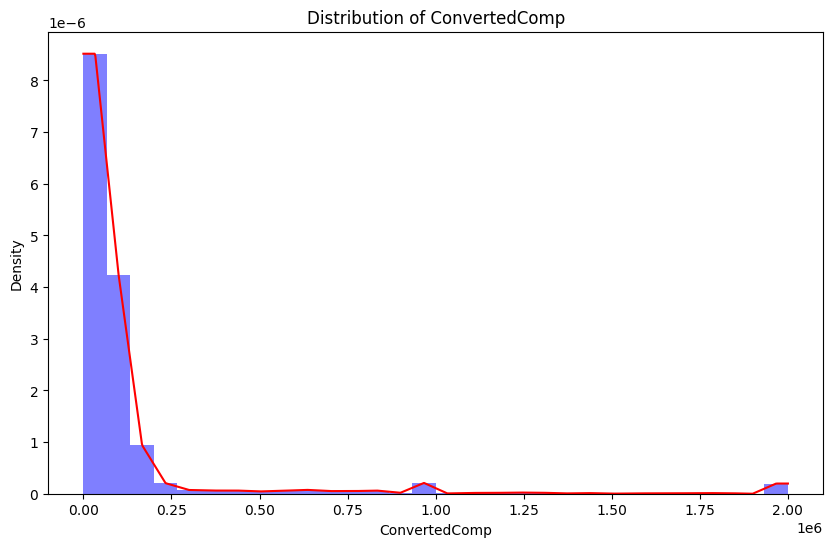

In [17]:
# your code goes here
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame and 'ConvertedComp' is the column of interest
plt.figure(figsize=(10, 6))

# Plotting the histogram
df['ConvertedComp'].plot(kind='hist', bins=30, density=True, alpha=0.5, color='blue')

# Plotting the KDE using numpy and matplotlib
data = df['ConvertedComp'].dropna()
density = np.histogram(data, bins=30, density=True)
x = np.linspace(min(data), max(data), 1000)
kde = np.interp(x, (density[1][:-1] + density[1][1:]) / 2, density[0])
plt.plot(x, kde, color='red')

plt.title('Distribution of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Density')
plt.show()


Plot the histogram for the column `ConvertedComp`.


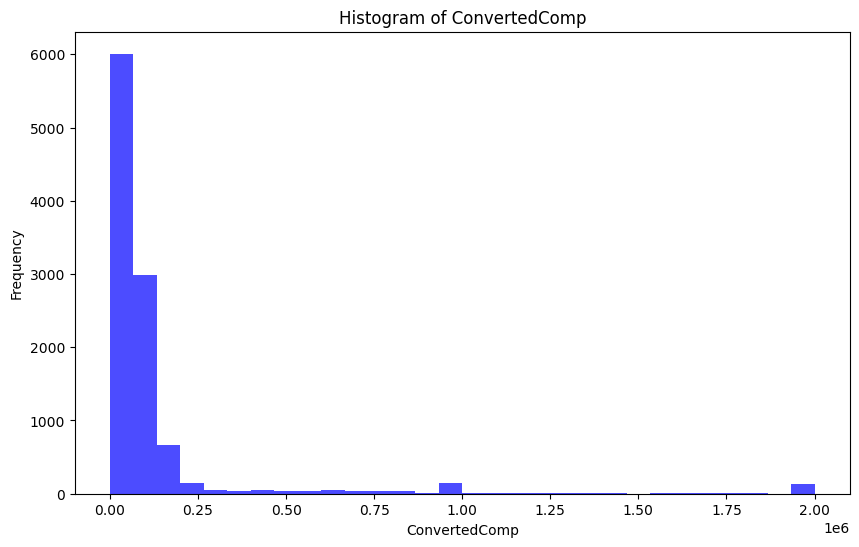

In [18]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'ConvertedComp' is the column of interest
plt.figure(figsize=(10, 6))
df['ConvertedComp'].plot(kind='hist', bins=30, color='blue', alpha=0.7)
plt.title('Histogram of ConvertedComp')
plt.xlabel('ConvertedComp')
plt.ylabel('Frequency')
plt.show()

What is the median of the column `ConvertedComp`?


In [19]:
# your code goes here
# Assuming 'df' is your DataFrame
median_converted_comp = df['ConvertedComp'].median()
print("The median of the ConvertedComp column is:", median_converted_comp)

The median of the ConvertedComp column is: 57745.0


How many responders identified themselves only as a **Man**?


In [20]:
# your code goes here
# Filter the dataset for responders who identified as 'Man'
man_responders = df[df['Gender'] == 'Man']

# Count the number of 'Man' responders
num_man_responders = man_responders.shape[0]

print(f"Number of responders who identified as a Man: {num_man_responders}")


Number of responders who identified as a Man: 10480


Find out the  median ConvertedComp of responders identified themselves only as a **Woman**?


In [21]:
# your code goes here
# Filter the dataset for responders who identified as 'Woman'
woman_responders = df[df['Gender'] == 'Woman']

# Calculate the median of 'ConvertedComp' for these responders
median_converted_comp_woman = woman_responders['ConvertedComp'].median()

print(f"Median ConvertedComp for women responders: {median_converted_comp_woman}")


Median ConvertedComp for women responders: 57708.0


Give the five number summary for the column `Age`?


**Double click here for hint**.

<!--
min,q1,median,q3,max of a column are its five number summary.
-->


In [22]:
# your code goes here
# Five-number summary for the 'Age' column
age_summary = df['Age'].describe()

print("Five-number summary for 'Age':")
print(age_summary)


Five-number summary for 'Age':
count    11111.000000
mean        30.778895
std          7.393686
min         16.000000
25%         25.000000
50%         29.000000
75%         35.000000
max         99.000000
Name: Age, dtype: float64


Plot a histogram of the column `Age`.


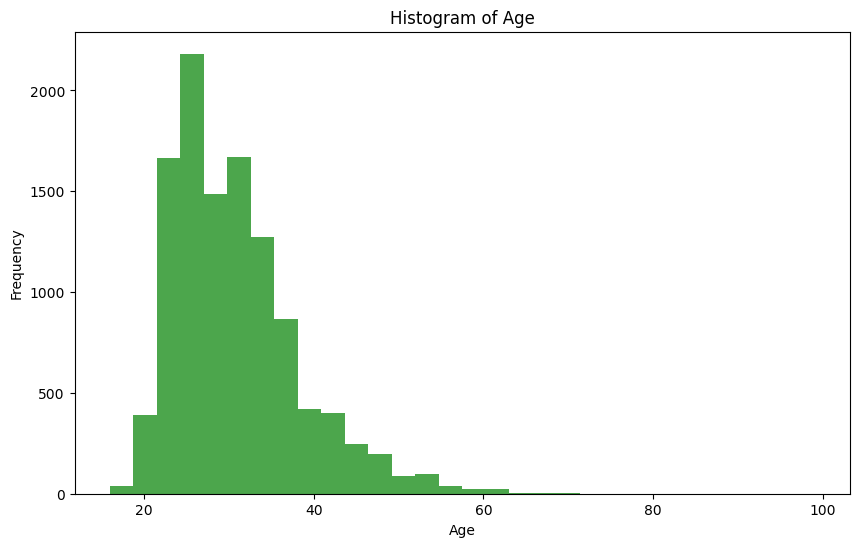

In [23]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame and 'Age' is the column of interest
plt.figure(figsize=(10, 6))
df['Age'].plot(kind='hist', bins=30, color='green', alpha=0.7)
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

## Outliers


### Finding outliers


Find out if outliers exist in the column `ConvertedComp` using a box plot?


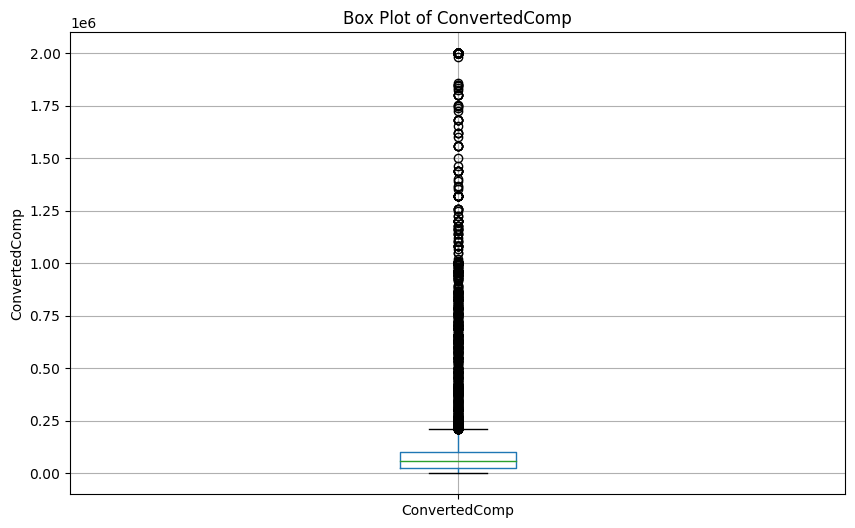

In [24]:
# your code goes here
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
plt.figure(figsize=(10, 6))
df.boxplot(column='ConvertedComp')
plt.title('Box Plot of ConvertedComp')
plt.ylabel('ConvertedComp')
plt.show()

Find out the Inter Quartile Range for the column `ConvertedComp`.


In [25]:
# your code goes here
# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = df['ConvertedComp'].quantile(0.25)
Q3 = df['ConvertedComp'].quantile(0.75)

# Calculate IQR
IQR = Q3 - Q1
print("Interquartile Range (IQR) is:", IQR)

Interquartile Range (IQR) is: 73132.0


Find out the upper and lower bounds.


In [26]:
# your code goes here
# Calculate the upper and lower bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print("Lower bound is:", lower_bound)
print("Upper bound is:", upper_bound)

Lower bound is: -82830.0
Upper bound is: 209698.0


Identify how many outliers are there in the `ConvertedComp` column.


In [27]:
# your code goes here
# Identify outliers
outliers = df[(df['ConvertedComp'] < lower_bound) | (df['ConvertedComp'] > upper_bound)]
num_outliers = outliers.shape[0]
print("Number of outliers in ConvertedComp:", num_outliers)

Number of outliers in ConvertedComp: 879


Create a new dataframe by removing the outliers from the `ConvertedComp` column.


In [28]:
# your code goes here
# Create a new DataFrame without outliers
df_no_outliers = df[(df['ConvertedComp'] >= lower_bound) & (df['ConvertedComp'] <= upper_bound)]
print("New DataFrame created by removing outliers.")

New DataFrame created by removing outliers.


## Correlation


### Finding correlation


Find the correlation between `Age` and all other numerical columns.


In [31]:
# your code goes here
# Calculate the correlation between 'Age' and all other numerical columns
correlation_age = df.corr()['Age'].drop('Age')  # Drop 'Age' to exclude self-correlation

print("Correlation of Age with other numerical columns:")
print(correlation_age)


<class 'ValueError'>: could not convert string to float: 'I am a developer by profession'

## Authors


Ramesh Sannareddy


### Other Contributors


Rav Ahuja


 Copyright © 2020 IBM Corporation. This notebook and its source code are released under the terms of the [MIT License](https://cognitiveclass.ai/mit-license?cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ&cm_mmc=Email_Newsletter-_-Developer_Ed%2BTech-_-WW_WW-_-SkillsNetwork-Courses-IBM-DA0321EN-SkillsNetwork-21426264&cm_mmca1=000026UJ&cm_mmca2=10006555&cm_mmca3=M12345678&cvosrc=email.Newsletter.M12345678&cvo_campaign=000026UJ).


<!--## Change Log


<!--| Date (YYYY-MM-DD) | Version | Changed By        | Change Description                 |
| ----------------- | ------- | ----------------- | ---------------------------------- |
| 2020-10-17        | 0.1     | Ramesh Sannareddy | Created initial version of the lab |--!>
